In [42]:
import pandas as pd
import json
import numpy as np

import joblib

pd.set_option('display.max_colwidth',  None)

with open('result.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df.fillna(0, inplace=True)
df = df.apply(lambda series: pd.to_numeric(series, errors='coerce'))
df = df.dropna()
df.head()

,Epidian 6D,Araldite GY260,Araldite GY250CH,CHS-520 (*CHS-530),CHS-525,CHS-590,Epidian 5,Epidian 6,Epilox AF 18-50,AH-24/Grilonit epoxide 8,Epidian 011,RD-3,RD-20,IPOX ER 1010,IPOX ER 1016,Cardura E,Benzilalkohol,EEW,TETA/ TEPA (a),IPDA,Jeffamine D230,Jeffamine D230 + Epilox1700,Jeffamine D230 + Epilox1700 (addukt 2),IPDA+1010 addukt,TEA/,Dytek A-MPMD/APU-2**,APU-4,trisDMP,DCH-99,MXDA,Ethacure 100,nonilfenol,etanol,AHEW,Fazékidő (min),Szakítószilárdság [MPa],Szakadási nyúlás [%]
0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.494908,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,24.400000,46.0,82.57,5.58
1,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.494908,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,27.685325,53.0,41.72,3.35
2,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.494908,70.0,0.0,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,31.228669,34.0,56.60,4.76
3,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.494908,60.0,0.0,20.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,35.812133,28.0,61.23,5.59
4,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.494908,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,27.685325,61.0,41.13,3.67


In [43]:
del df["EEW"]
del df["nonilfenol"]
del df["etanol"]
del df["AHEW"]
df.head()

,Epidian 6D,Araldite GY260,Araldite GY250CH,CHS-520 (*CHS-530),CHS-525,CHS-590,Epidian 5,Epidian 6,Epilox AF 18-50,AH-24/Grilonit epoxide 8,Epidian 011,RD-3,RD-20,IPOX ER 1010,IPOX ER 1016,Cardura E,Benzilalkohol,TETA/ TEPA (a),IPDA,Jeffamine D230,Jeffamine D230 + Epilox1700,Jeffamine D230 + Epilox1700 (addukt 2),IPDA+1010 addukt,TEA/,Dytek A-MPMD/APU-2**,APU-4,trisDMP,DCH-99,MXDA,Ethacure 100,Fazékidő (min),Szakítószilárdság [MPa],Szakadási nyúlás [%]
0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,82.57,5.58
1,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,41.72,3.35
2,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,20.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,56.60,4.76
3,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,20.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,61.23,5.59
4,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,41.13,3.67


In [44]:
unique_counts = {column: df[column].nunique() for column in df.columns}
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Count'])
unique_counts_df

,Column,Unique Count
0,Epidian 6D,2
1,Araldite GY260,4
2,Araldite GY250CH,4
3,CHS-520 (*CHS-530),5
4,CHS-525,3
5,CHS-590,2
6,Epidian 5,3
7,Epidian 6,3
8,Epilox AF 18-50,2
9,AH-24/Grilonit epoxide 8,5


In [54]:
df.iloc[:, -3:]

,Fazékidő (min),Szakítószilárdság [MPa],Szakadási nyúlás [%]
0,46.0,82.57,5.58
1,53.0,41.72,3.35
2,34.0,56.60,4.76
3,28.0,61.23,5.59
4,61.0,41.13,3.67
5,60.0,34.19,4.01
6,42.0,43.74,4.15
7,30.0,44.19,2.58
8,34.0,53.29,3.02
9,55.0,31.71,2.45


In [56]:
for column in df.columns:
    value_counts = df[column].value_counts()
    count_of_counts = value_counts.value_counts()
    print(value_counts)
    # print(f'Count of counts for column {column}:\n{count_of_counts}\n')

0.0     243
20.0    118
Name: Epidian 6D, dtype: int64
0.0     350
20.0      4
80.0      4
75.0      3
Name: Araldite GY260, dtype: int64
0.0     355
20.0      2
90.0      2
80.0      2
Name: Araldite GY250CH, dtype: int64
0.0     345
90.0     10
20.0      2
80.0      2
75.0      2
Name: CHS-520 (*CHS-530), dtype: int64
0.0     353
20.0      4
80.0      4
Name: CHS-525, dtype: int64
0.0     359
20.0      2
Name: CHS-590, dtype: int64
0.0     353
20.0      4
80.0      4
Name: Epidian 5, dtype: int64
0.0     353
20.0      4
80.0      4
Name: Epidian 6, dtype: int64
0.0     223
60.0    138
Name: Epilox AF 18-50, dtype: int64
0.0     192
20.0    143
5.0      14
10.0     11
15.0      1
Name: AH-24/Grilonit epoxide 8, dtype: int64
0.0     352
40.0      4
10.0      4
5.0       1
Name: Epidian 011, dtype: int64
0.0     189
5.0     119
10.0     47
50.0      2
40.0      2
15.0      1
20.0      1
Name: RD-3, dtype: int64
0.0     342
5.0      11
10.0      4
20.0      3
15.0      1
Name: RD-20, dty

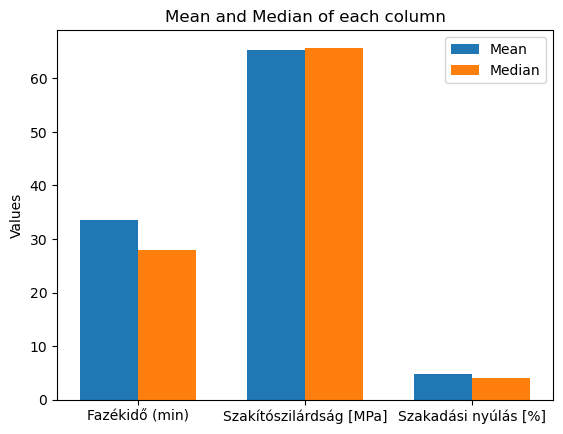

In [59]:
mean_values = df.iloc[:, -3:].mean()
median_values = df.iloc[:, -3:].median()

# Define a range for X axis
x = np.arange(len(df.iloc[:, -3:].columns))

# Set width of a bar in bar plot
width = 0.35

# Visualize the mean and median
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, mean_values, width, label='Mean')
rects2 = ax.bar(x + width/2, median_values, width, label='Median')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Mean and Median of each column')
ax.set_xticks(x)
ax.set_xticklabels(df.iloc[:, -3:].columns)
ax.legend()

# Show the plot
plt.show()

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# To store each unique value for each column in a new DataFrame
unique_data = {column: df[column].unique() for column in df.columns}
unique_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in unique_data.items()]))
unique_df = unique_df.fillna('-')


unique_df

,Epidian 6D,Araldite GY260,Araldite GY250CH,CHS-520 (*CHS-530),CHS-525,CHS-590,Epidian 5,Epidian 6,Epilox AF 18-50,AH-24/Grilonit epoxide 8,Epidian 011,RD-3,RD-20,IPOX ER 1010,IPOX ER 1016,Cardura E,Benzilalkohol,TETA/ TEPA (a),IPDA,Jeffamine D230,Jeffamine D230 + Epilox1700,Jeffamine D230 + Epilox1700 (addukt 2),IPDA+1010 addukt,TEA/,Dytek A-MPMD/APU-2**,APU-4,trisDMP,DCH-99,MXDA,Ethacure 100,Fazékidő (min),Szakítószilárdság [MPa],Szakadási nyúlás [%]
0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,82.57,5.58
1,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,40.0,50.0,10.0,25.0,75.0,20.0,10.0,80.0,60.0,20.0,20.0,20.0,20.0,10.0,100.0,100.0,20.0,10.0,10.0,10.0,53.0,41.72,3.35
2,-,80.0,90.0,90.0,80.0,-,80.0,80.0,-,10.0,5.0,40.0,20.0,50.0,50.0,-,20.0,70.0,40.0,30.0,30.0,15.0,-,20.0,70.0,10.0,10.0,20.0,20.0,20.0,34.0,56.60,4.76
3,-,75.0,80.0,80.0,-,-,-,-,-,5.0,10.0,5.0,5.0,75.0,25.0,-,5.0,60.0,20.0,40.0,40.0,10.0,-,15.0,60.0,20.0,-,25.0,25.0,-,28.0,61.23,5.59
4,-,-,-,75.0,-,-,-,-,-,15.0,-,10.0,15.0,95.0,20.0,-,15.0,0.0,5.0,5.0,60.0,30.0,-,5.0,40.0,25.0,-,30.0,30.0,-,61.0,41.13,3.67
5,-,-,-,-,-,-,-,-,-,-,-,15.0,-,90.0,10.0,-,30.0,20.0,10.0,10.0,35.0,25.0,-,-,20.0,30.0,-,-,40.0,-,60.0,34.19,4.01
6,-,-,-,-,-,-,-,-,-,-,-,20.0,-,85.0,-,-,25.0,40.0,65.0,25.0,5.0,-,-,-,10.0,5.0,-,-,-,-,42.0,43.74,4.15
7,-,-,-,-,-,-,-,-,-,-,-,-,-,80.0,-,-,40.0,50.0,50.0,50.0,10.0,-,-,-,-,15.0,-,-,-,-,30.0,44.19,2.58
8,-,-,-,-,-,-,-,-,-,-,-,-,-,70.0,-,-,-,55.0,30.0,60.0,50.0,-,-,-,-,-,-,-,-,-,55.0,53.29,3.02
9,-,-,-,-,-,-,-,-,-,-,-,-,-,60.0,-,-,-,30.0,25.0,15.0,70.0,-,-,-,-,-,-,-,-,-,76.0,31.71,2.45


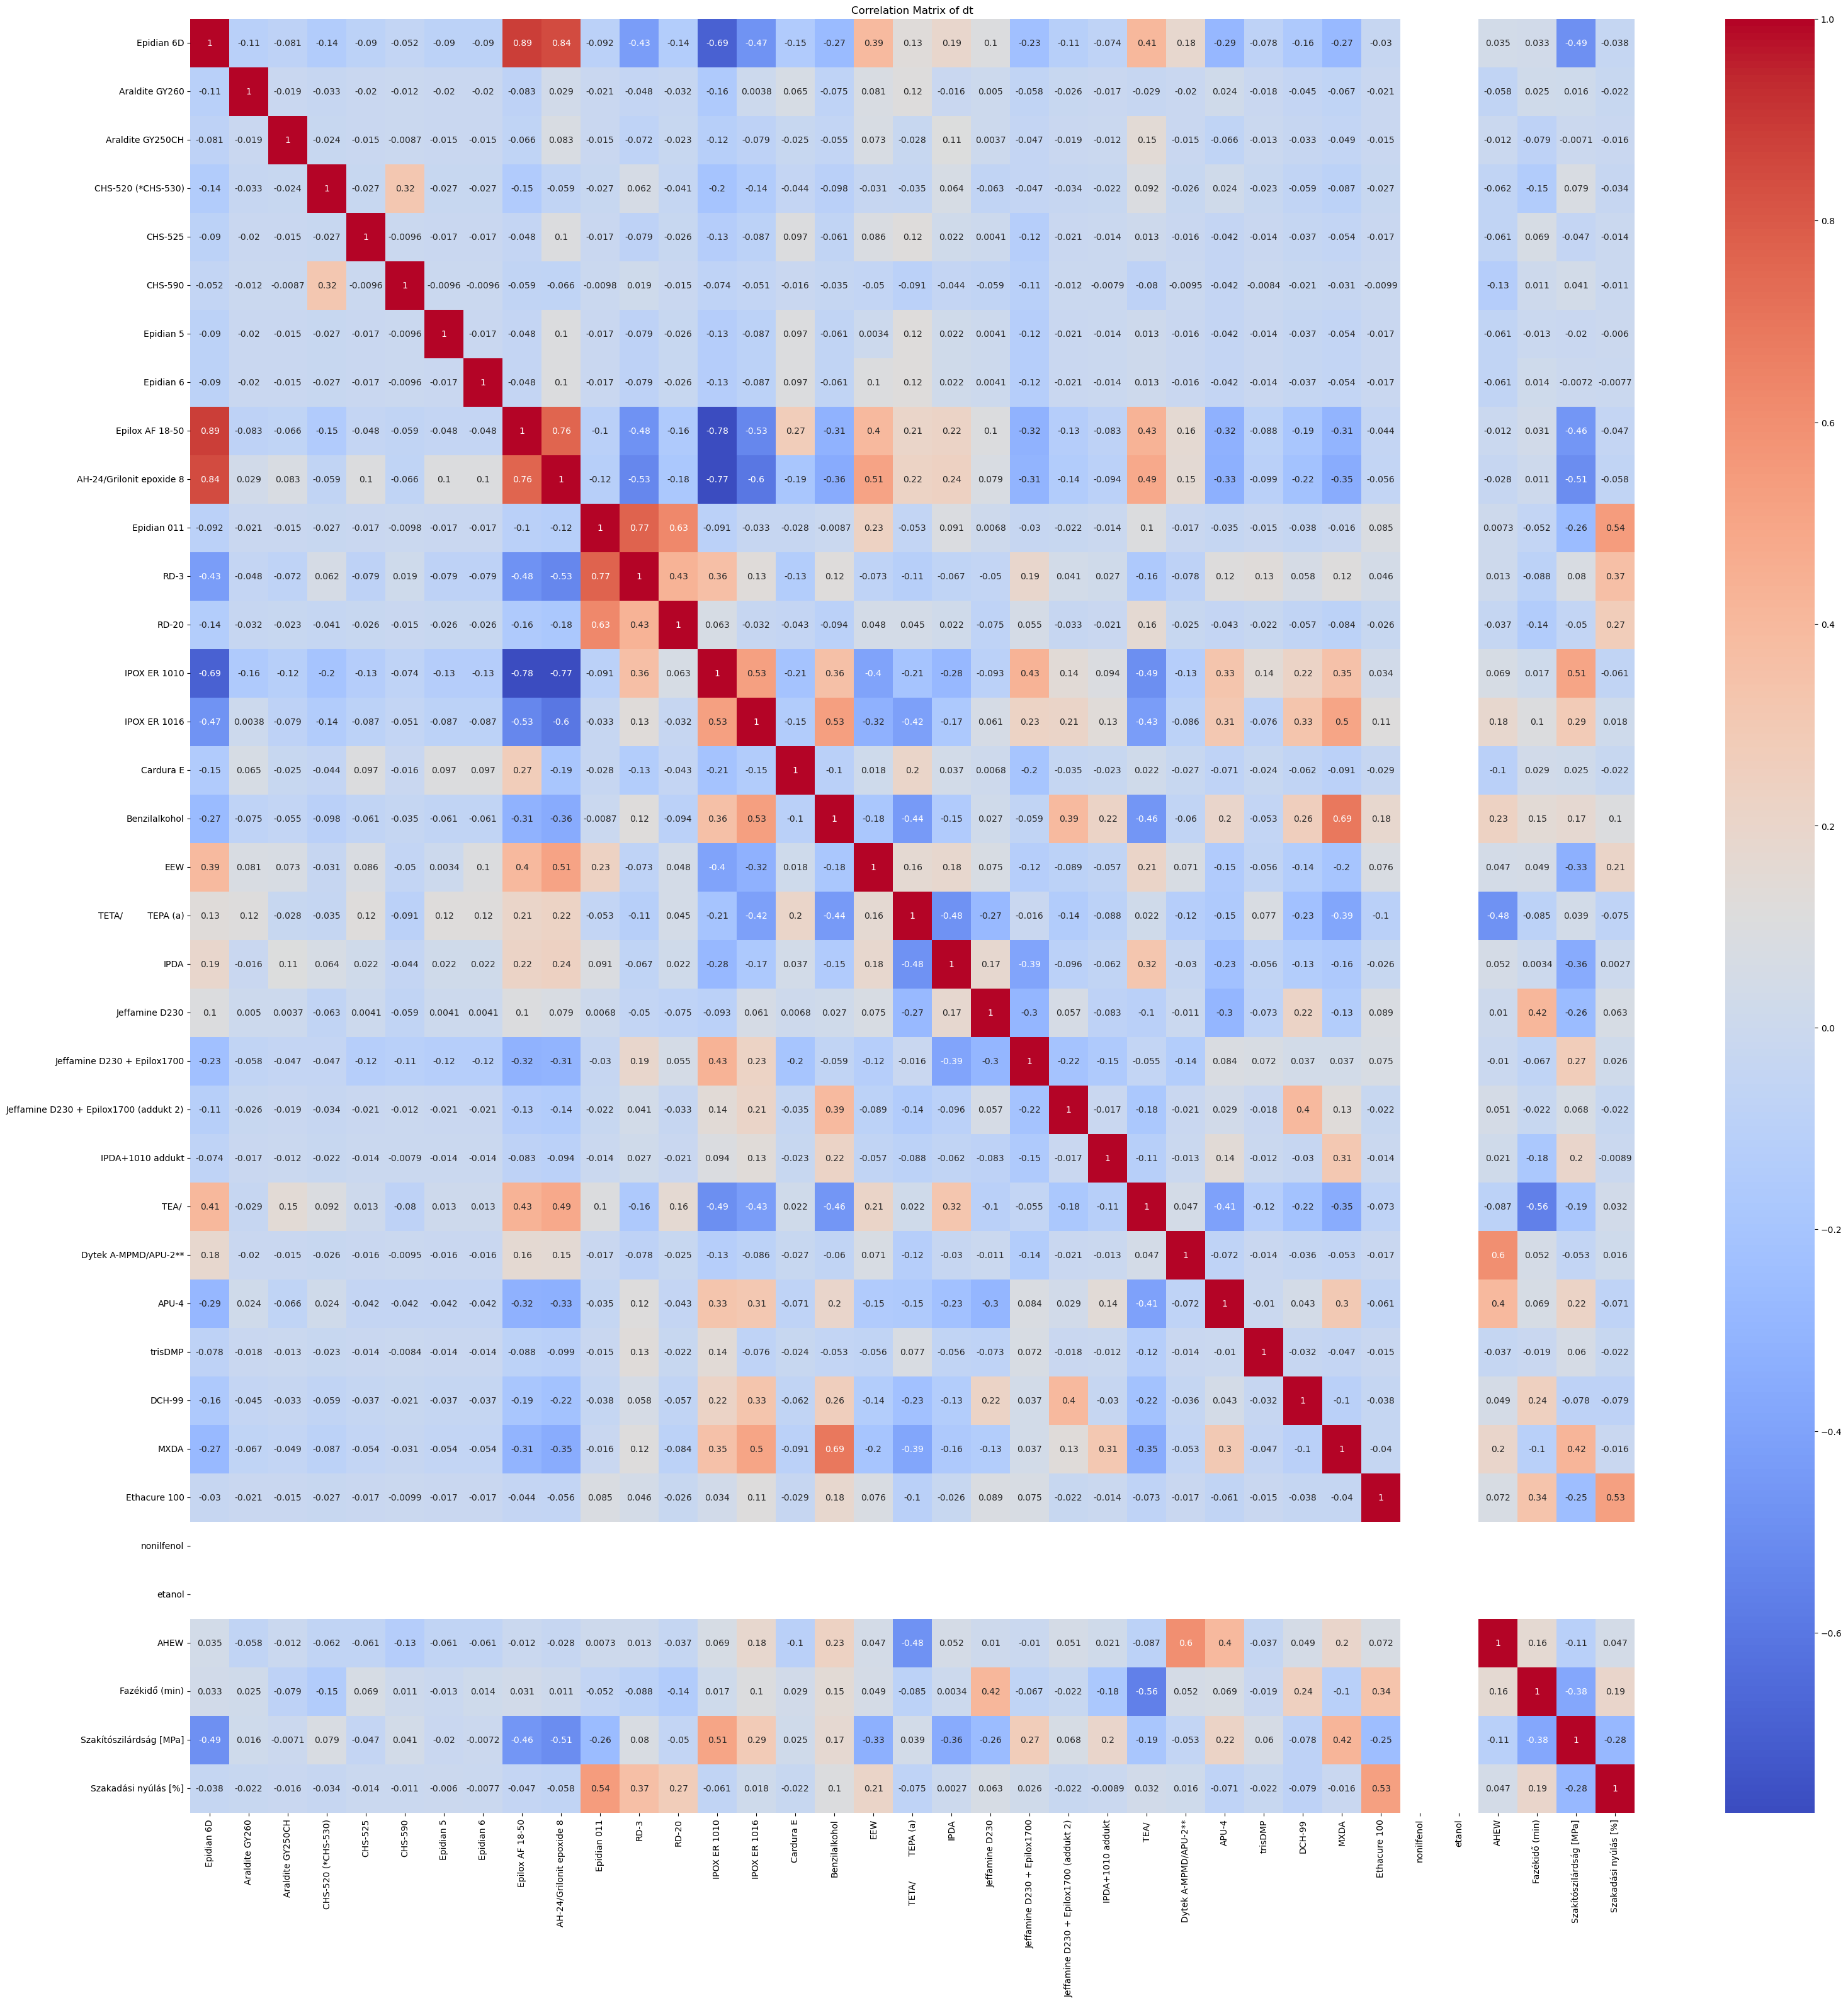

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(df.shape[1], df.shape[1]))  # You may need to adjust the size based on your dataset.
sns.heatmap(correlation_matrix,
            annot=True,      # This will write the values inside the squares.
            cmap='coolwarm') # Use a color map that is easy to understand.
plt.title('Correlation Matrix of dt')
plt.show()

,Fazékidő (min),Szakítószilárdság [MPa],Szakadási nyúlás [%]
0,46.0,82.57,5.58
1,53.0,41.72,3.35
2,34.0,56.60,4.76
3,28.0,61.23,5.59
4,61.0,41.13,3.67
5,60.0,34.19,4.01
6,42.0,43.74,4.15
7,30.0,44.19,2.58
8,34.0,53.29,3.02
9,55.0,31.71,2.45


In [46]:
import pandas as pd
import numpy as np

# Assume that df is your DataFrame and the last 3 columns are your inputs.

input_data = df.iloc[:, -3:]  # Adjust as necessary to target your input features.
output_data = df.iloc[:, :-3]  # Adjust as necessary to target your output features.

correlations = {}

print(f"Input columns: {input_data.columns}")
print(f"Output columns: {output_data.columns}")

for output_column in output_data.columns:
    combined_df = pd.concat([input_data, output_data[output_column]], axis=1)
    correlation_matrix = combined_df.corr()
    correlations[output_column] = correlation_matrix[output_column].iloc[:-1]  # exclude self-correlation

print(correlations)

Input columns: Index(['Fazékidő (min)', 'Szakítószilárdság [MPa]', 'Szakadási nyúlás [%]'], dtype='object')
Output columns: Index(['Epidian 6D', 'Araldite GY260', 'Araldite GY250CH',
       'CHS-520 (*CHS-530)', 'CHS-525', 'CHS-590', 'Epidian 5', 'Epidian 6',
       'Epilox AF 18-50', 'AH-24/Grilonit epoxide 8', 'Epidian 011', 'RD-3',
       'RD-20', 'IPOX ER 1010', 'IPOX ER 1016', 'Cardura E', 'Benzilalkohol',
       'TETA/         TEPA (a)', 'IPDA', 'Jeffamine D230',
       'Jeffamine D230 + Epilox1700', 'Jeffamine D230 + Epilox1700 (addukt 2)',
       'IPDA+1010 addukt', 'TEA/ ', 'Dytek A-MPMD/APU-2**', 'APU-4', 'trisDMP',
       'DCH-99', 'MXDA', 'Ethacure 100'],
      dtype='object')
{'Epidian 6D': Fazékidő (min)             0.032524
Szakítószilárdság [MPa]   -0.488968
Szakadási nyúlás [%]      -0.037964
Name: Epidian 6D, dtype: float64, 'Araldite GY260': Fazékidő (min)             0.025425
Szakítószilárdság [MPa]    0.016238
Szakadási nyúlás [%]      -0.022302
Name: Araldite GY26

In [51]:
threshold = 0.25
outputs_to_keep = []

for output, corr in correlations.items():
    if any(abs(corr) >= threshold for corr in corr):
        outputs_to_keep.append(output)

print(f"Outputs to keep: {outputs_to_keep}")
print(len(outputs_to_keep))


Outputs to keep: ['Epidian 6D', 'Epilox AF 18-50', 'AH-24/Grilonit epoxide 8', 'Epidian 011', 'RD-3', 'RD-20', 'IPOX ER 1010', 'IPOX ER 1016', 'IPDA', 'Jeffamine D230', 'Jeffamine D230 + Epilox1700', 'TEA/ ', 'MXDA', 'Ethacure 100']
14


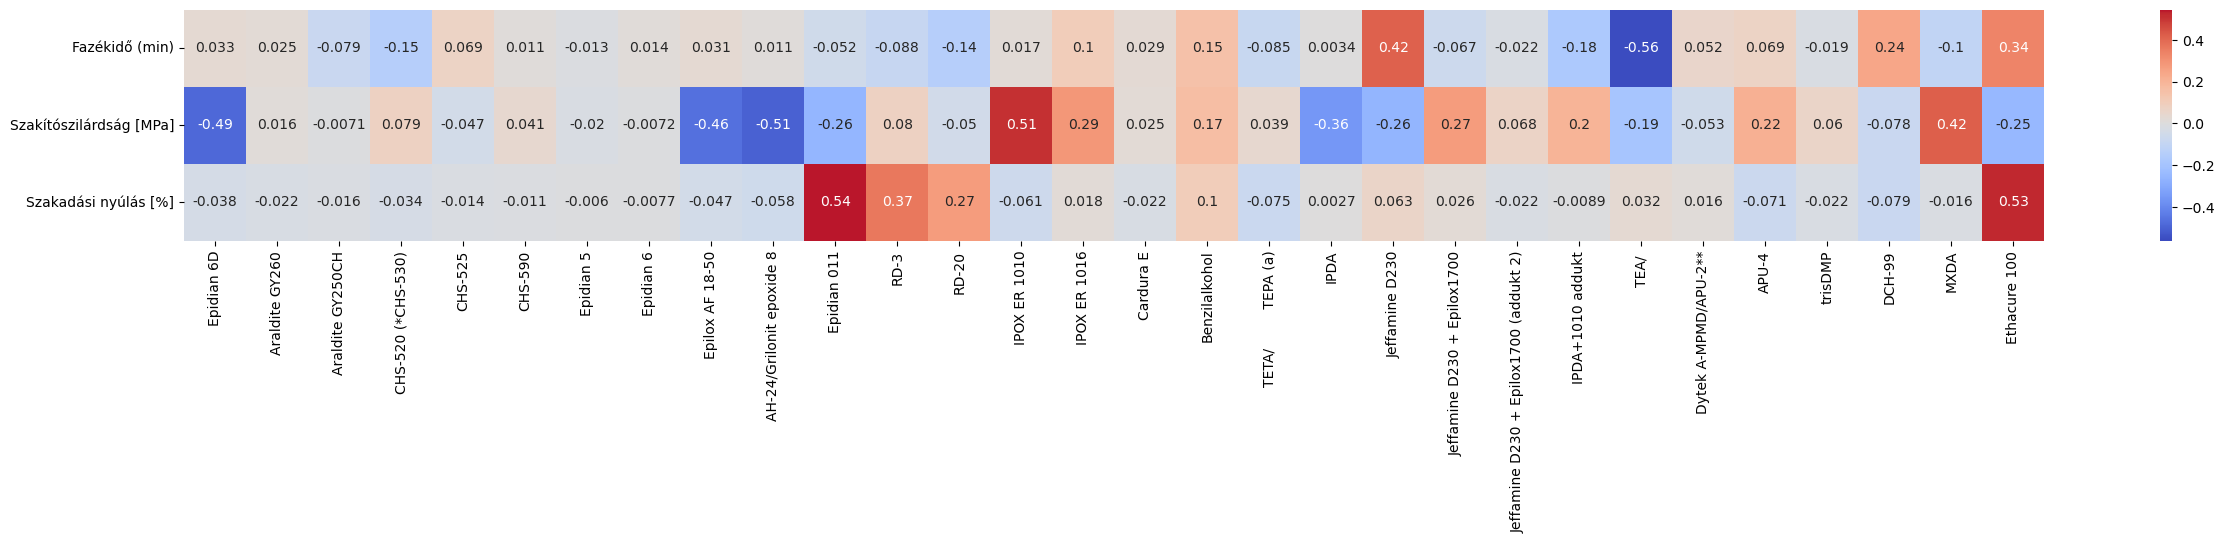

In [49]:
correlations_df = pd.DataFrame(correlations)

# Create a heatmap
plt.figure(figsize=(output_data.shape[1], input_data.shape[1]))
sns.heatmap(correlations_df, annot=True, cmap='coolwarm', center=0)
plt.show()

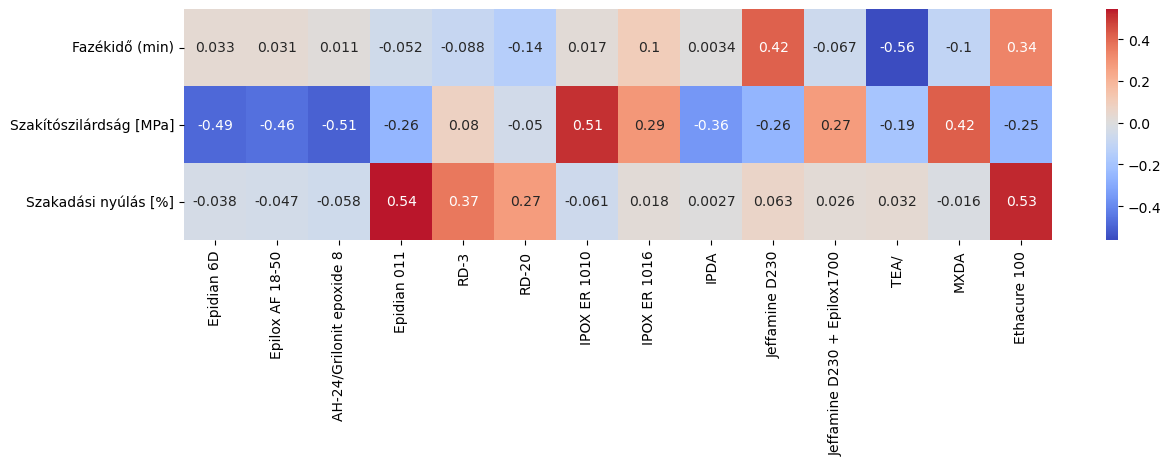

In [52]:
# Subset the correlations DataFrame
correlations_df_subset = correlations_df[outputs_to_keep]

# Create a heatmap for the subset
plt.figure(figsize=(len(outputs_to_keep), len(input_data.columns)))
sns.heatmap(correlations_df_subset, annot=True, cmap='coolwarm', center=0)
plt.show()


In [21]:
colnames = ['Epidian 6D', 'Araldite GY260', 'Araldite GY250CH', 'CHS-520 (*CHS-530)', 'CHS-525', 'CHS-590', 'Epidian 5', 'Epidian 6', 'Epilox AF 18-50', 'AH-24/Grilonit epoxide 8', 'Epidian 011', 'RD-3', 'RD-20', 'IPOX ER 1010', 'IPOX ER 1016', 'Cardura E', 'Benzilalkohol', 'EEW', 'TETA/         TEPA (a)', 'IPDA', 'Jeffamine D230', 'Jeffamine D230 + Epilox1700', 'Jeffamine D230 + Epilox1700 (addukt 2)', 'IPDA+1010 addukt', 'TEA/ ', 'Dytek A-MPMD/APU-2**', 'APU-4', 'trisDMP', 'DCH-99', 'MXDA', 'Ethacure 100', 'nonilfenol', 'etanol', 'AHEW', 'Fazékidő (min)', 'Szakítószilárdság [MPa]', 'Szakadási nyúlás [%]']
y_colnames = colnames[:-3]
print(y_colnames)

['Epidian 6D', 'Araldite GY260', 'Araldite GY250CH', 'CHS-520 (*CHS-530)', 'CHS-525', 'CHS-590', 'Epidian 5', 'Epidian 6', 'Epilox AF 18-50', 'AH-24/Grilonit epoxide 8', 'Epidian 011', 'RD-3', 'RD-20', 'IPOX ER 1010', 'IPOX ER 1016', 'Cardura E', 'Benzilalkohol', 'EEW', 'TETA/         TEPA (a)', 'IPDA', 'Jeffamine D230', 'Jeffamine D230 + Epilox1700', 'Jeffamine D230 + Epilox1700 (addukt 2)', 'IPDA+1010 addukt', 'TEA/ ', 'Dytek A-MPMD/APU-2**', 'APU-4', 'trisDMP', 'DCH-99', 'MXDA', 'Ethacure 100', 'nonilfenol', 'etanol', 'AHEW']


In [22]:
df["EEW"]

0      194.494908
1      194.494908
2      194.494908
3      194.494908
4      194.494908
5      194.494908
6      194.494908
7      194.494908
8      194.494908
9      194.494908
10     194.494908
11     194.494908
12     194.494908
13     194.494908
14     194.494908
15     194.494908
16     194.494908
17     194.494908
18     194.494908
19     194.494908
20     194.494908
21     194.494908
22     194.494908
23     194.494908
24     194.494908
25     194.494908
26     194.494908
27     194.494908
28     194.494908
29     194.494908
30     194.494908
31     194.494908
32     194.494908
33     194.494908
34     194.494908
35     194.494908
36     194.494908
37     194.494908
38     194.494908
39     194.494908
40     194.494908
41     189.622400
42     189.622400
43     189.622400
44     189.622400
45     188.785534
46     188.785534
47     188.785534
48     188.785534
49     186.560578
50     186.560578
51     186.560578
52     186.560578
53     189.207565
54     189.207565
55     189

In [220]:
X = df.iloc[:, -3:]
# y = df.iloc[:, -4]
y = df.iloc[:, :-3]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


ss = StandardScaler().fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [15]:
joblib.dump(ss, 'scaler1.bin', compress=True)

['scaler1.bin']

In [19]:
df.shape

(361, 37)

In [211]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create a RandomForestRegressor object
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Evaluate the model on the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("Training set:")
print("RMSE:", train_rmse)
print("R2 Score:", train_r2)
print("MAE:", train_mae)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Test set:")
print("RMSE:", test_rmse)
print("R2 Score:", test_r2)
print("MAE:", test_mae)


Training set:
RMSE: 4.314957476579735
R2 Score: 0.8055597099113619
MAE: 1.1290123456790122
Test set:
RMSE: 17.673099500255915
R2 Score: 0.003515887904917636
MAE: 5.841891891891893


In [76]:
my_data = [[46, 82, 6]]
my_data_scaled = ss.transform(my_data)
output = rf_model.predict(my_data_scaled)
print(output)


[7.2]


c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [221]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, 
                          cv = 5, scoring='neg_mean_squared_error', n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_
# Print the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)



# Create a RandomForestRegressor object
# rf_model = RandomForestRegressor()
rf_model = best_rf_model

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Evaluate the model on the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("Training set:")
print("RMSE:", train_rmse)
print("R2 Score:", train_r2)
print("MAE:", train_mae)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Test set:")
print("RMSE:", test_rmse)
print("R2 Score:", test_r2)
print("MAE:", test_mae)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation RMSE scores: [10.70033064  9.70916237  9.84869318 13.44299029 12.33130558]
Mean RMSE: 11.20649641213754
Training set:
RMSE: 7.573733711132112
R2 Score: 0.6525224377152561
MAE: 3.040638456005445
Test set:
RMSE: 10.300232805535218
R2 Score: 0.280848465746253
MAE: 4.461484675719653


In [223]:
my_data = [[16, 80.37, 3.94]]
my_data_scaled = ss.transform(my_data)
output = rf_model.predict(my_data_scaled)
print(output)
output_df = pd.DataFrame(output, columns = y_colnames)
output_df

[[4.00000000e-02 2.12226190e+01 1.85714286e-01 3.35428571e+01
  5.05714286e-01 0.00000000e+00 5.33333333e-01 4.00000000e-02
  2.41142857e+00 3.17136905e+00 0.00000000e+00 4.60410714e+00
  4.00000000e-01 2.48466667e+01 7.91809524e+00 5.78095238e-01
  8.57142857e-01 1.84160754e+02 4.11195833e+01 8.43333333e-01
  1.73190476e+00 2.90023810e+01 0.00000000e+00 3.73809524e-01
  1.14158929e+01 0.00000000e+00 1.28909524e+01 5.00000000e-02
  5.00000000e-02 1.66500000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.93229175e+01]]


c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Epidian 6D,Araldite GY260,Araldite GY250CH,CHS-520 (*CHS-530),CHS-525,CHS-590,Epidian 5,Epidian 6,Epilox AF 18-50,AH-24/Grilonit epoxide 8,Epidian 011,RD-3,RD-20,IPOX ER 1010,IPOX ER 1016,Cardura E,Benzilalkohol,EEW,TETA/ TEPA (a),IPDA,Jeffamine D230,Jeffamine D230 + Epilox1700,Jeffamine D230 + Epilox1700 (addukt 2),IPDA+1010 addukt,TEA/,Dytek A-MPMD/APU-2**,APU-4,trisDMP,DCH-99,MXDA,Ethacure 100,nonilfenol,etanol,AHEW
0,0.04,21.222619,0.185714,33.542857,0.505714,0.0,0.533333,0.04,2.411429,3.171369,0.0,4.604107,0.4,24.846667,7.918095,0.578095,0.857143,184.160754,41.119583,0.843333,1.731905,29.002381,0.0,0.37381,11.415893,0.0,12.890952,0.05,0.05,1.665,0.0,0.0,0.0,49.322917


In [256]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU


model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1]),
    LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(X_train.shape[1]*2),
    LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(X_train.shape[1]*4),
    LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(X_train.shape[1]*8),
    LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(X_train.shape[1]*16),
    LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(X_train.shape[1]*8),
    LeakyReLU(alpha=0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(y_train.shape[1], activation='linear'),
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=20, callbacks=[early_stopping])


Epoch 1/300
13/13 [==============================] - 2s 46ms/step - loss: 13.5135 - val_loss: 13.0805
Epoch 2/300
13/13 [==============================] - 0s 22ms/step - loss: 13.4463 - val_loss: 13.0918
Epoch 3/300
13/13 [==============================] - 0s 22ms/step - loss: 13.4228 - val_loss: 13.1004
Epoch 4/300
13/13 [==============================] - 0s 22ms/step - loss: 13.3689 - val_loss: 13.1052
Epoch 5/300
13/13 [==============================] - 0s 22ms/step - loss: 13.3258 - val_loss: 13.1062
Epoch 6/300
13/13 [==============================] - 0s 22ms/step - loss: 13.2910 - val_loss: 13.1048
Epoch 7/300
13/13 [==============================] - 0s 22ms/step - loss: 13.2661 - val_loss: 13.1024
Epoch 8/300
13/13 [==============================] - 0s 22ms/step - loss: 13.2198 - val_loss: 13.0980
Epoch 9/300
13/13 [==============================] - 0s 22ms/step - loss: 13.1935 - val_loss: 13.0935
Epoch 10/300
13/13 [==============================] - 0s 22ms/step - loss: 13.1729

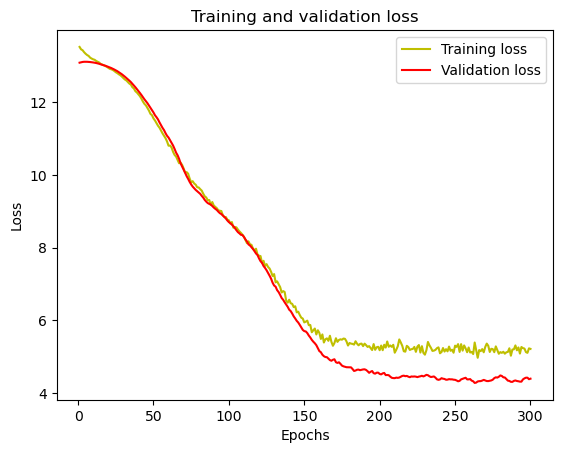

In [257]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [258]:
from sklearn import metrics

nn_pred = model.predict(ss.transform(X_test))


nn_MSE = metrics.mean_squared_error(y_test, nn_pred)
nn_MAE = metrics.mean_absolute_error(y_test, nn_pred)
nn_MAPE = metrics.mean_absolute_percentage_error(y_test, nn_pred)
nn_accuracy = 100-(nn_MAPE*100)

print('MSE', nn_MSE )
print('MAE', nn_MAE)
print('MAPE', nn_MAPE)
print('Accuracy', nn_accuracy)

2/2 [==============================] - 0s 4ms/step


c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MSE 170.72899587157417
MAE 5.789160963708287
MAPE 8230643055464833.0
Accuracy -8.230643055464832e+17


In [254]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_229 (Dense)           (None, 3)                 12        
                                                                 
 batch_normalization_165 (Ba  (None, 3)                12        
 tchNormalization)                                               
                                                                 
 dense_230 (Dense)           (None, 6)                 24        
                                                                 
 batch_normalization_166 (Ba  (None, 6)                24        
 tchNormalization)                                               
                                                                 
 dense_231 (Dense)           (None, 12)                84        
                                                                 
 batch_normalization_167 (Ba  (None, 12)             

In [261]:
my_data = [[46, 82.5, 3.45]]
my_data_scaled = ss.transform(my_data)
output = model.predict(my_data_scaled)
print(output)

output_df = pd.DataFrame(output, columns = y_colnames)
output_df
output_df.shape

1/1 [==============================] - 0s 24ms/step
[[-5.66972196e-02  1.53185753e-03  1.23431301e-03  1.06831652e-03
  -4.54440014e-03 -1.44457549e-03  1.96182402e-03 -6.16173446e-03
   3.28339458e-01  4.50594664e-01 -1.04467813e-02  4.75970078e+00
   1.05600618e-03  7.20880051e+01  1.32250538e+01 -3.82538792e-03
   1.55536309e-02  1.77474319e+02  1.92044392e+01  2.28323266e-02
   5.66314173e+00  2.65898914e+01 -6.05114619e-04 -6.38034567e-03
   2.82917857e+00 -1.11434702e-03  1.10605575e-01 -2.97348801e-04
  -4.15207818e-04  4.45382623e-03  9.28633031e-04 -1.24526850e-04
  -5.18961530e-03  5.31527176e+01]]


c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(1, 34)

In [263]:
# Assume output_df is your dataframe containing the predictions

# Create empty dataframes for the lower and upper bounds
lower_bound_df = pd.DataFrame(index=output_df.index, columns=output_df.columns)
upper_bound_df = pd.DataFrame(index=output_df.index, columns=output_df.columns)

for column in output_df.columns:
    # Calculate MAE and MAPE for each column
    mae = nn_MAE
    
    # Calculate lower and upper bounds for each column
    lower_bound_df[column] = output_df[column] - mae
    upper_bound_df[column] = output_df[column] + mae

# Now lower_bound_df and upper_bound_df contain the lower and upper bounds for each prediction, respectively

upper_bound_df.head()
lower_bound_df.head()


,Epidian 6D,Araldite GY260,Araldite GY250CH,CHS-520 (*CHS-530),CHS-525,CHS-590,Epidian 5,Epidian 6,Epilox AF 18-50,AH-24/Grilonit epoxide 8,Epidian 011,RD-3,RD-20,IPOX ER 1010,IPOX ER 1016,Cardura E,Benzilalkohol,EEW,TETA/ TEPA (a),IPDA,Jeffamine D230,Jeffamine D230 + Epilox1700,Jeffamine D230 + Epilox1700 (addukt 2),IPDA+1010 addukt,TEA/,Dytek A-MPMD/APU-2**,APU-4,trisDMP,DCH-99,MXDA,Ethacure 100,nonilfenol,etanol,AHEW
0,-5.845858,-5.787629,-5.787926,-5.788093,-5.793705,-5.790605,-5.787199,-5.795322,-5.460821,-5.338566,-5.799607,-1.02946,-5.788105,66.298843,7.435893,-5.792986,-5.773607,171.685165,13.415278,-5.766328,-0.126019,20.800732,-5.789766,-5.795541,-2.959982,-5.790275,-5.678555,-5.789458,-5.789576,-5.784707,-5.788232,-5.789285,-5.79435,47.363556


In [236]:
model.save('nn1_d.h5')